## Import the usual Packages

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

## Read the COMSOL data file

In [2]:
filename = 'data.txt'
data = np.loadtxt(filename,comments ='%')

## Print the number of columns and rows 

In [3]:
nrows, ncols = data.shape
print('rows:',nrows)
print('columns:',ncols)

rows: 2500
columns: 4


## Get the  X and Y co-ordinates

In [4]:
x = np.unique(data[:,0]) 
y = np.unique(data[:,1]) 
len(x)

50

## With these two 1D arrays, compute the spacing between points of evaluation

In [5]:
all_x_spacing = np.diff(x)
all_y_spacing = np.diff(y)

x_spacing = all_x_spacing[0]
y_spacing = all_y_spacing[0]

len(all_x_spacing)

49

In [6]:
np.allclose(all_x_spacing, x_spacing),np.allclose(all_y_spacing, y_spacing)

(True, True)

## Create 2D arrays for the cordinates using meshgrid, initialize the two displacement fields:

....and store the displacemnets data from data in the 2D arrays u and v:

In [7]:
xx, yy = np.meshgrid(x,y)
u = np.zeros_like(xx)
v = np.zeros_like(yy)

for row in data:
    u_value = row[2]
    v_value = row[3]
    
    x_values = row[0] - x_spacing/2

    y_values = row[1] - y_spacing/2
    
    i = int(x_values/x_spacing)
    j = int(y_values/y_spacing)
    
    u[j,i] = u_value
    v[j,i] = v_value


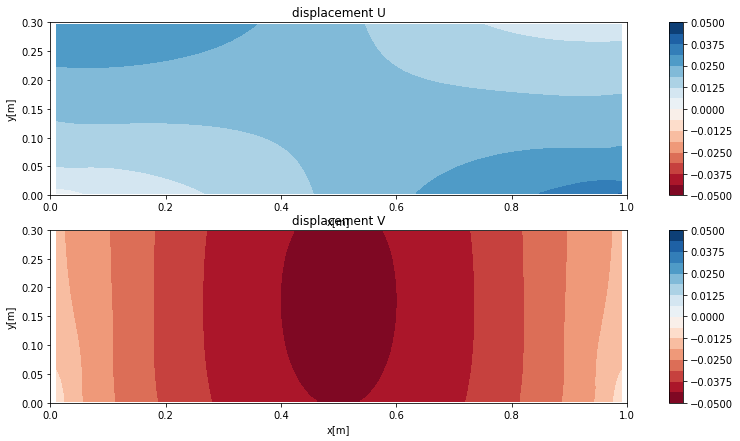

In [8]:
fig, (ax0, ax1) = plt.subplots(nrows =2 , figsize = (15,7))
levels = np.linspace(-5e-2,5e-2,17)

cf = ax0.contourf(xx,yy,u,cmap='RdBu', levels=levels)
ax0.set(xlim = (0,1), ylim = (0,0.3), xlabel = 'x[m]', ylabel = 'y[m]', title = 'displacement U', aspect = 'equal')
plt.colorbar(cf, ax = ax0, aspect = 12)

cf = ax1.contourf(xx,yy,v,cmap='RdBu', levels=levels)
ax1.set(xlim = (0,1), ylim = (0,0.3), xlabel = 'x[m]', ylabel = 'y[m]', title = 'displacement V', aspect = 'equal')
plt.colorbar(cf, ax = ax1, aspect = 12)

plt.show(fig)